In [1]:
%reset
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%run ./DataGenerationScripts/load_default_parameters.ipynb # loading model parameters
%run ./DataGenerationScripts/dIBDRdt_functions.ipynb # loading time derivative functions 
%run ./DataGenerationScripts/set_size.ipynb # loading function for pdf output sizer

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
h=2.8*0.393701 #inch
w=2.8*0.393701 #inch

alpha_value=0.6
col='gray'
marker_sizer=2.5
mrksize=10
margin=0.4 #relative

font = {'size'   : 8}
plt.rc('font', **font)
plt.rc('text', usetex=True)

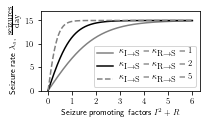

In [3]:
params=load_default_parameters('stochastic')
i2_r=np.linspace(0, 6,10001)

kappa_XS_low = 1 # altenative value for k_IS and k_RS
kappa_XS_orig = 2 # altenative value for k_IS and k_RS
kappa_XS_high = 5 # altenative value for k_IS and k_RS


fig= plt.figure()
ax = fig.add_subplot(1, 1, 1) 
plt.plot(i2_r,params['lambda_max']*(np.exp(kappa_XS_low*i2_r)-1)/(np.exp(kappa_XS_low*i2_r)+1),color='grey',label=r'$\kappa_{\textnormal{I→S}}=\kappa_{\textnormal{R→S}}=1$')
plt.plot(i2_r,params['lambda_max']*(np.exp(kappa_XS_orig*i2_r)-1)/(np.exp(kappa_XS_orig*i2_r)+1),'k',label=r'$\kappa_{\textnormal{I→S}}=\kappa_{\textnormal{R→S}}=2$')
plt.plot(i2_r,params['lambda_max']*(np.exp(kappa_XS_high*i2_r)-1)/(np.exp(kappa_XS_high*i2_r)+1),'--',color='grey',label=r'$\kappa_{\textnormal{I→S}}=\kappa_{\textnormal{R→S}}=5$')
plt.xlabel(r'Seizure promoting factors $I^2+R$')
plt.ylabel(r'Seizure rate $\lambda_s$, $\frac{\textnormal{seizures}}{\textnormal{day}}$')

ax.legend( loc='lower right')

tix= np.arange(0,7)
plt.xticks(tix)
plt.ylim([0,17])

plt.gcf().subplots_adjust(top=1-margin)
plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(2*w,w) 
fig.savefig('./Figures/Supplementary/Fig_S7.pdf')